In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
#create a path
path = r"C:\Users\jacob\Documents\Data Analytics\Data Immersion\Achievement 6\Energy_GDP_Project"

In [3]:
#import data
df = pd.read_csv(os.path.join(path, '02 data', 'prepared data', 'energy_gdp_merged_inner_countries.csv'))

In [4]:
%matplotlib inline

### Data Checks

In [5]:
#check ouptput
df.head()

,country,year,combined_key,ea_%_pop,%_energy_nuclear,%_energy_renewables,%_energy_fossil_fuels,gdp
0,Afghanistan,2000,"Afghanistan, 2000",4.446891,0.0,0.0,0.0,183.532775
1,Afghanistan,2001,"Afghanistan, 2001",9.294527,0.0,0.0,0.0,183.532775
2,Afghanistan,2002,"Afghanistan, 2002",14.133616,0.0,0.0,0.0,183.532775
3,Afghanistan,2003,"Afghanistan, 2003",18.971165,0.0,0.0,0.0,200.462376
4,Afghanistan,2004,"Afghanistan, 2004",23.814182,0.0,0.0,0.0,221.657662


In [6]:
df.shape

(4730, 8)

In [7]:
df.isnull().sum()

country                  0
year                     0
combined_key             0
ea_%_pop                 0
%_energy_nuclear         0
%_energy_renewables      0
%_energy_fossil_fuels    0
gdp                      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
#create a dataframe subset that removes categorical columns
df_num = df[['ea_%_pop', '%_energy_nuclear', '%_energy_renewables', '%_energy_fossil_fuels', 'gdp']]

In [10]:
df_num.head()

,ea_%_pop,%_energy_nuclear,%_energy_renewables,%_energy_fossil_fuels,gdp
0,4.446891,0.0,0.0,0.0,183.532775
1,9.294527,0.0,0.0,0.0,183.532775
2,14.133616,0.0,0.0,0.0,183.532775
3,18.971165,0.0,0.0,0.0,200.462376
4,23.814182,0.0,0.0,0.0,221.657662


In [11]:
df_num.rename(columns = {'gdp' : 'gdp_per_capita'},inplace = True)

C:\Users\jacob\AppData\Local\Temp\ipykernel_18664\142466263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.rename(columns = {'gdp' : 'gdp_per_capita'},inplace = True)


In [12]:
#check output
df_num.head()

,ea_%_pop,%_energy_nuclear,%_energy_renewables,%_energy_fossil_fuels,gdp_per_capita
0,4.446891,0.0,0.0,0.0,183.532775
1,9.294527,0.0,0.0,0.0,183.532775
2,14.133616,0.0,0.0,0.0,183.532775
3,18.971165,0.0,0.0,0.0,200.462376
4,23.814182,0.0,0.0,0.0,221.657662


In [13]:
#check for clusters
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [14]:
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))]

C:\users\jacob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\users\jacob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\users\jacob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\users\jacob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [15]:
score

[-2097208107982.2751,
 -775892922358.6445,
 -356928150624.01074,
 -214995836024.96985,
 -119362187878.83481,
 -85211402122.6633,
 -66419730628.97101,
 -50333730598.71179,
 -37878652634.64776]

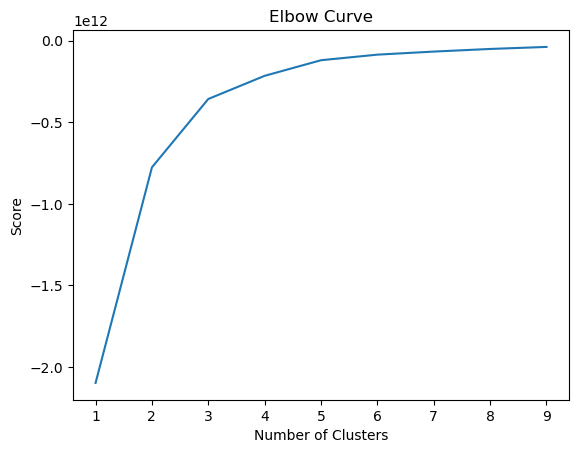

In [16]:
#plot score to check for curves and number of clusters
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The curve begins to flatten out after 3, so I will choose 3 clusters to represent the data

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [18]:
# Fit the k-means object to the data.

kmeans.fit(df_num)

C:\users\jacob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [19]:
#create a new column for clusters groups
df_num['clusters'] = kmeans.fit_predict(df_num)

C:\users\jacob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jacob\AppData\Local\Temp\ipykernel_18664\2057782835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['clusters'] = kmeans.fit_predict(df_num)


In [20]:
#check ouptut
df_num.head()

,ea_%_pop,%_energy_nuclear,%_energy_renewables,%_energy_fossil_fuels,gdp_per_capita,clusters
0,4.446891,0.0,0.0,0.0,183.532775,1
1,9.294527,0.0,0.0,0.0,183.532775,1
2,14.133616,0.0,0.0,0.0,183.532775,1
3,18.971165,0.0,0.0,0.0,200.462376,1
4,23.814182,0.0,0.0,0.0,221.657662,1


In [21]:
df_num['clusters'].value_counts()

clusters
1    3491
2    1083
0     156
Name: count, dtype: int64

C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


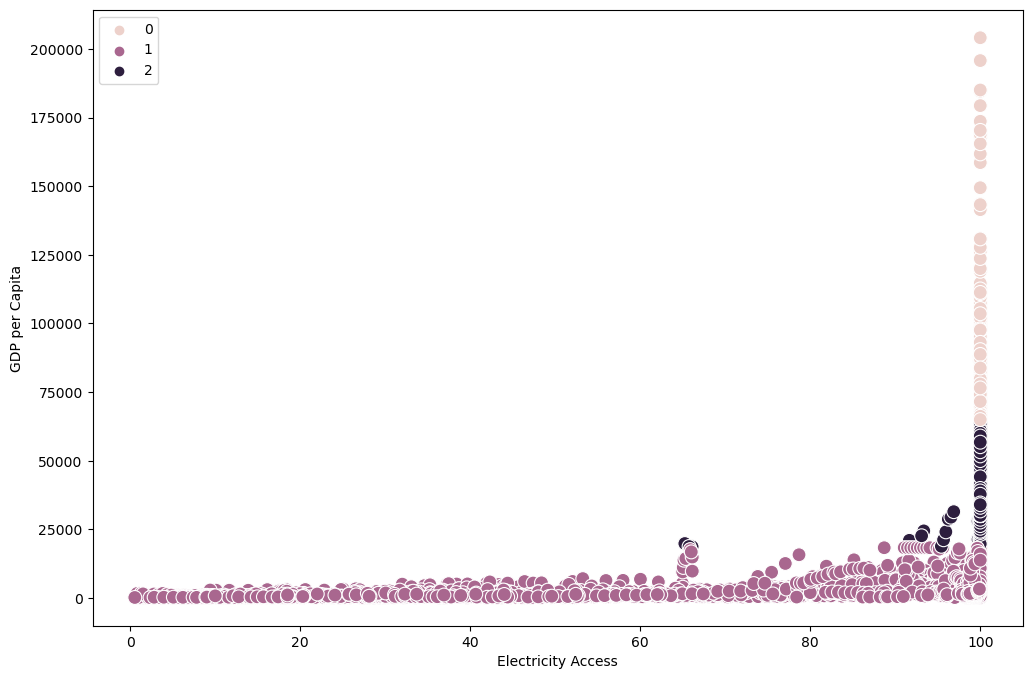

In [22]:
#plot clusters for electricity access vs gdp per capita

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['ea_%_pop'], y=df_num['gdp_per_capita'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Electricity Access')
plt.ylabel('GDP per Capita')
plt.show()

These clusters make a lot of sense. They are grouped by gdp and have a clear distinction between them.

C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


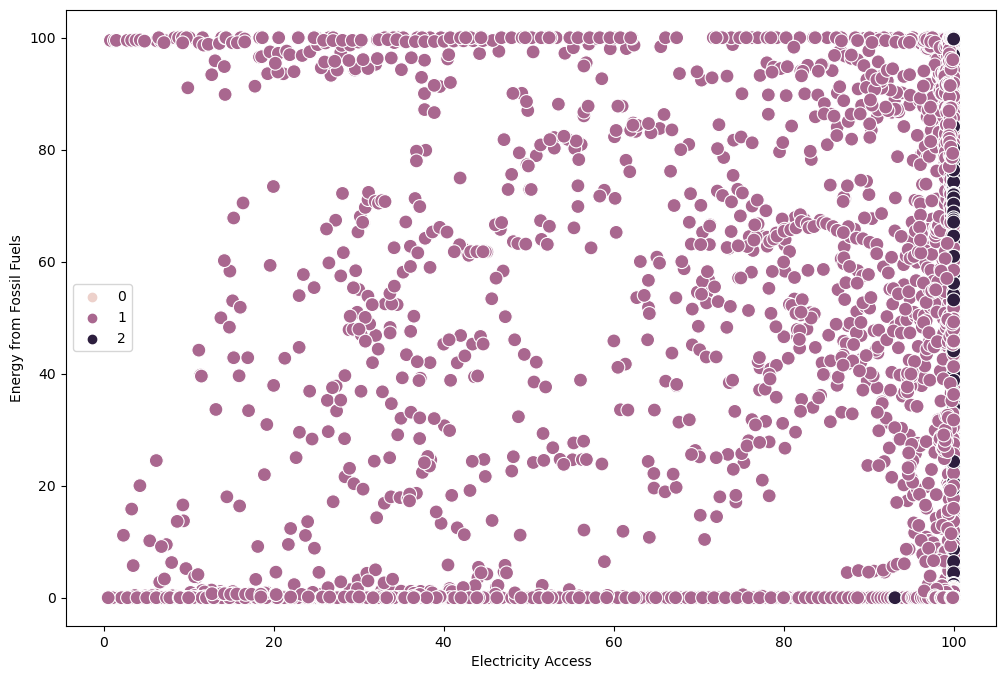

In [23]:
#plot clusters for electricity access vs % energy from fossil fuels

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['ea_%_pop'], y=df_num['%_energy_fossil_fuels'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Electricity Access')
plt.ylabel('Energy from Fossil Fuels')
plt.show()

These cluters do not make a lot of senese to me. I don't think there is much rhyme or reason. probably because gdp is not involved in this chart.

C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


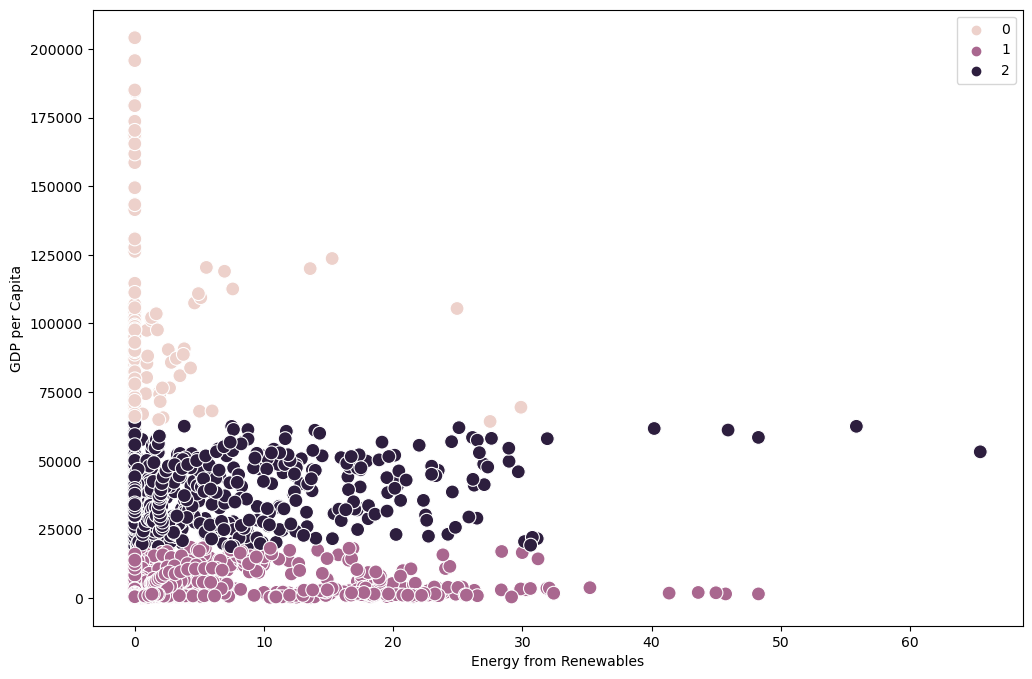

In [24]:
#plot clusters for energy from renewables vs gdp per capita

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['%_energy_renewables'], y=df_num['gdp_per_capita'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Energy from Renewables')
plt.ylabel('GDP per Capita')
plt.show()

these clusters make sense to me, as they are grouped by GDP.

C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


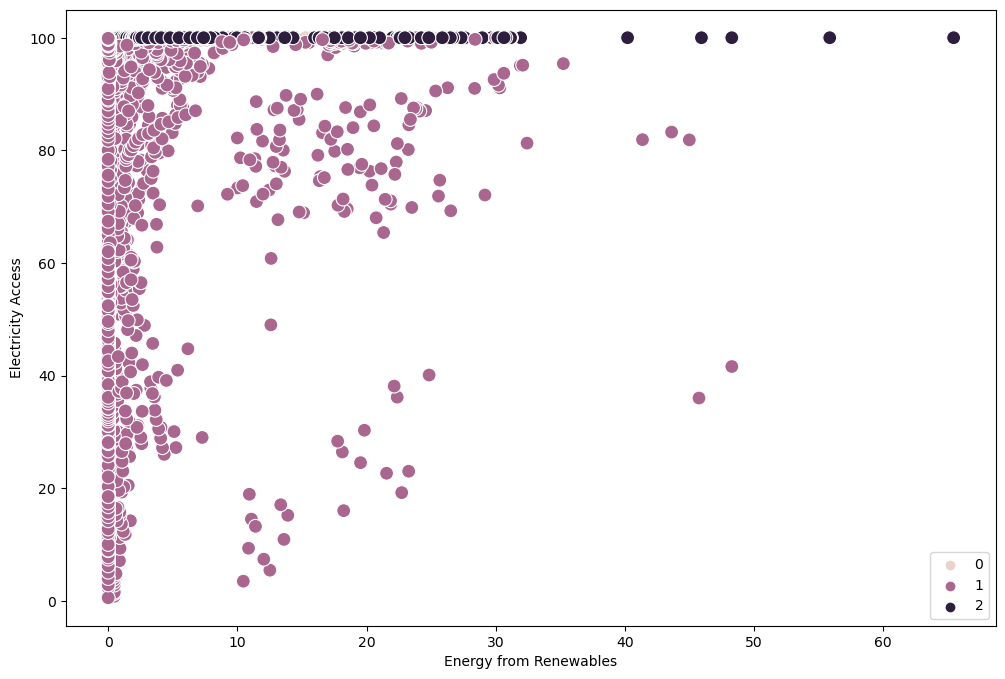

In [25]:
#plot clusters for energy from renewables vs Electricity Access

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['%_energy_renewables'], y=df_num['ea_%_pop'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Energy from Renewables')
plt.ylabel('Electricity Access')
plt.show()

these clusters don't make a whole lot of sense, again because GDP is not part of this chart.

In [26]:
df_num.loc[df_num['clusters'] == 0, 'clusters'] = 'pink'
df_num.loc[df_num['clusters'] == 1, 'clusters'] = 'purple'
df_num.loc[df_num['clusters'] == 2, 'clusters'] = 'dark purple'

C:\Users\jacob\AppData\Local\Temp\ipykernel_18664\1786041309.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'pink' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_num.loc[df_num['clusters'] == 0, 'clusters'] = 'pink'


In [27]:
df_num.groupby('clusters').agg({'ea_%_pop' : ['mean', 'median'],
                               '%_energy_nuclear' : ['mean', 'median'],
                               '%_energy_renewables' : ['mean', 'median'],
                               '%_energy_fossil_fuels' : ['mean', 'median'],
                               'gdp_per_capita' : ['mean', 'median']})

ea_%_pop             %_energy_nuclear         \
                  mean      median             mean median   
clusters                                                     
dark purple  99.856991  100.000000         9.409821    0.0   
pink         99.997667  100.000000         2.286051    0.0   
purple       73.571037   91.584877         2.897235    0.0   

            %_energy_renewables           %_energy_fossil_fuels             \
                           mean    median                  mean     median   
clusters                                                                     
dark purple            3.463050  0.363468             40.004946  29.043995   
pink                   1.325751  0.000000             14.104748   0.000000   
purple                 1.549882  0.000000             40.665779  37.246964   

            gdp_per_capita                
                      mean        median  
clusters                                  
dark purple   32654.936897  28981.457330  
pink          95908.580888  87184.512990  
purple         4473.882704   2520.285026

Based on all of this analysis and looking at the clusters, I think one of the most effective ways to look at the data is by grouping the countries by their gdp per capita. It is the only variable with a significan difference.

Another thing to note is that %_energy_... represents the energy production rather than energy consumption. So this data does not suggest that the dark purple group (the group with the highest gdp) does not use very much energy, rather that it does not produce very much. Which would be another interesting project to look into. Tracking where countries get their energy from. 

Another interesting thing to look at would be countries that are the the outter edges of the clusters. Deep analysis would need to be conducted, but it would be interesting to determine what makes a group more likley to have a higher GDP per capita than a country witha similar GDP. What are the factors outside of this data that contribute to that?

As said earlier, I think the most useful thing going forward is looking at countries based off their GDP per capita and looking for differences within those groups. And looking at the edges of each cluster to determine other contributing factors.

In [28]:
df_num.head()

,ea_%_pop,%_energy_nuclear,%_energy_renewables,%_energy_fossil_fuels,gdp_per_capita,clusters
0,4.446891,0.0,0.0,0.0,183.532775,purple
1,9.294527,0.0,0.0,0.0,183.532775,purple
2,14.133616,0.0,0.0,0.0,183.532775,purple
3,18.971165,0.0,0.0,0.0,200.462376,purple
4,23.814182,0.0,0.0,0.0,221.657662,purple


In [34]:
df.loc[df_num['clusters'] == 'pink', 'gdp_category'] = 'high'
df.loc[df_num['clusters'] == 'purple', 'gdp_category'] = 'low'
df.loc[df_num['clusters'] == 'dark purple', 'gdp_category'] = 'medium'

In [35]:
df.head()

,country,year,combined_key,ea_%_pop,%_energy_nuclear,%_energy_renewables,%_energy_fossil_fuels,gdp,gdp_category,clusters
0,Afghanistan,2000,"Afghanistan, 2000",4.446891,0.0,0.0,0.0,183.532775,low,low
1,Afghanistan,2001,"Afghanistan, 2001",9.294527,0.0,0.0,0.0,183.532775,low,low
2,Afghanistan,2002,"Afghanistan, 2002",14.133616,0.0,0.0,0.0,183.532775,low,low
3,Afghanistan,2003,"Afghanistan, 2003",18.971165,0.0,0.0,0.0,200.462376,low,low
4,Afghanistan,2004,"Afghanistan, 2004",23.814182,0.0,0.0,0.0,221.657662,low,low


In [37]:
df['gdp_category'].value_counts()

gdp_category
low       3491
medium    1083
high       156
Name: count, dtype: int64

In [38]:
#clean up df
df.drop(columns = {'combined_key', 'clusters'}, inplace = True)

In [39]:
df.head()

,country,year,ea_%_pop,%_energy_nuclear,%_energy_renewables,%_energy_fossil_fuels,gdp,gdp_category
0,Afghanistan,2000,4.446891,0.0,0.0,0.0,183.532775,low
1,Afghanistan,2001,9.294527,0.0,0.0,0.0,183.532775,low
2,Afghanistan,2002,14.133616,0.0,0.0,0.0,183.532775,low
3,Afghanistan,2003,18.971165,0.0,0.0,0.0,200.462376,low
4,Afghanistan,2004,23.814182,0.0,0.0,0.0,221.657662,low


In [40]:
df.isnull().sum()

country                  0
year                     0
ea_%_pop                 0
%_energy_nuclear         0
%_energy_renewables      0
%_energy_fossil_fuels    0
gdp                      0
gdp_category             0
dtype: int64

In [41]:
df.rename(columns = {'ea_%_pop' : 'ele_access',
                     '%_energy_nuclear' : '%_nuclear',
                     '%_energy_renewables' : '%_renew',
                     '%_energy_fossil_fuels' : '%_fossil_fuels',
                     'gdp' : 'gdp_per_capita'}, inplace = True)

In [42]:
df.head()

,country,year,ele_access,%_nuclear,%_renew,%_fossil_fuels,gdp_per_capita,gdp_category
0,Afghanistan,2000,4.446891,0.0,0.0,0.0,183.532775,low
1,Afghanistan,2001,9.294527,0.0,0.0,0.0,183.532775,low
2,Afghanistan,2002,14.133616,0.0,0.0,0.0,183.532775,low
3,Afghanistan,2003,18.971165,0.0,0.0,0.0,200.462376,low
4,Afghanistan,2004,23.814182,0.0,0.0,0.0,221.657662,low


In [43]:
df.isnull().sum()

country           0
year              0
ele_access        0
%_nuclear         0
%_renew           0
%_fossil_fuels    0
gdp_per_capita    0
gdp_category      0
dtype: int64

In [44]:
#export data to csv file to use in tableau
df.to_csv(os.path.join(path, '02 data', 'prepared data', 'energy_gdp_storyboard.csv'))

In [45]:
df.describe()

,year,ele_access,%_nuclear,%_renew,%_fossil_fuels,gdp_per_capita
count,4730.000000,4730.000000,4730.000000,4730.000000,4730.000000,4730.000000
mean,2003.887315,80.461152,4.368226,1.980537,39.638463,13941.936532
std,7.055844,30.087069,13.008783,5.284833,39.220871,21058.857897
min,1990.000000,0.533899,0.000000,0.000000,0.000000,110.460875
25%,1998.000000,69.710360,0.000000,0.000000,0.000000,1323.236545
50%,2004.000000,99.000000,0.000000,0.000000,32.016672,4832.516478
75%,2010.000000,100.000000,0.000000,1.051397,78.820447,19446.456570
max,2015.000000,100.000000,87.986221,65.443742,100.000000,204097.210000


In [46]:
df.groupby('gdp_category').agg({'ele_access' : ['mean', 'median'],
                               '%_nuclear' : ['mean', 'median'],
                               '%_renew' : ['mean', 'median'],
                               '%_fossil_fuels' : ['mean', 'median'],
                               'gdp_per_capita' : ['mean', 'median']})

ele_access             %_nuclear          %_renew            \
                   mean      median      mean median      mean    median   
gdp_category                                                               
high          99.997667  100.000000  2.286051    0.0  1.325751  0.000000   
low           73.571037   91.584877  2.897235    0.0  1.549882  0.000000   
medium        99.856991  100.000000  9.409821    0.0  3.463050  0.363468   

             %_fossil_fuels            gdp_per_capita                
                       mean     median           mean        median  
gdp_category                                                         
high              14.104748   0.000000   95908.580888  87184.512990  
low               40.665779  37.246964    4473.882704   2520.285026  
medium            40.004946  29.043995   32654.936897  28981.457330

In [48]:
df.head()

,country,year,ele_access,%_nuclear,%_renew,%_fossil_fuels,gdp_per_capita,gdp_category
0,Afghanistan,2000,4.446891,0.0,0.0,0.0,183.532775,low
1,Afghanistan,2001,9.294527,0.0,0.0,0.0,183.532775,low
2,Afghanistan,2002,14.133616,0.0,0.0,0.0,183.532775,low
3,Afghanistan,2003,18.971165,0.0,0.0,0.0,200.462376,low
4,Afghanistan,2004,23.814182,0.0,0.0,0.0,221.657662,low


In [49]:
#create a subset of the main dataframe to check for correlations
df_sub = df[['ele_access', '%_nuclear', '%_renew', '%_fossil_fuels', 'gdp_per_capita', 'gdp_category']]

In [50]:
df_sub.head()

,ele_access,%_nuclear,%_renew,%_fossil_fuels,gdp_per_capita,gdp_category
0,4.446891,0.0,0.0,0.0,183.532775,low
1,9.294527,0.0,0.0,0.0,183.532775,low
2,14.133616,0.0,0.0,0.0,183.532775,low
3,18.971165,0.0,0.0,0.0,200.462376,low
4,23.814182,0.0,0.0,0.0,221.657662,low


In [51]:
df_sub.groupby('gdp_category').corr()

ele_access  %_nuclear   %_renew  %_fossil_fuels  \
gdp_category                                                                   
high         ele_access        1.000000   0.033808  0.042732        0.058968   
             %_nuclear         0.033808   1.000000  0.079421       -0.096579   
             %_renew           0.042732   0.079421  1.000000        0.369609   
             %_fossil_fuels    0.058968  -0.096579  0.369609        1.000000   
             gdp_per_capita    0.040039  -0.130437 -0.048462       -0.066717   
low          ele_access        1.000000   0.207812  0.093329        0.270288   
             %_nuclear         0.207812   1.000000 -0.016285        0.030490   
             %_renew           0.093329  -0.016285  1.000000        0.086372   
             %_fossil_fuels    0.270288   0.030490  0.086372        1.000000   
             gdp_per_capita    0.548442   0.147703  0.048354        0.057037   
medium       ele_access        1.000000   0.040132  0.038787        0.076196   
             %_nuclear         0.040132   1.000000  0.055605       -0.090402   
             %_renew           0.038787   0.055605  1.000000        0.068744   
             %_fossil_fuels    0.076196  -0.090402  0.068744        1.000000   
             gdp_per_capita    0.081202   0.052714  0.341102       -0.017858   

                             gdp_per_capita  
gdp_category                                 
high         ele_access            0.040039  
             %_nuclear            -0.130437  
             %_renew              -0.048462  
             %_fossil_fuels       -0.066717  
             gdp_per_capita        1.000000  
low          ele_access            0.548442  
             %_nuclear             0.147703  
             %_renew               0.048354  
             %_fossil_fuels        0.057037  
             gdp_per_capita        1.000000  
medium       ele_access            0.081202  
             %_nuclear             0.052714  
             %_renew               0.341102  
             %_fossil_fuels       -0.017858  
             gdp_per_capita        1.000000